![clas](problemas_clas.png)

In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import statsmodels as sm
import sklearn as sk
import statsmodels.api as sm

In [257]:
df = pd.read_csv('../Clase_2022_06_07/titanic.csv', index_col = 0)
x = df[['Fare']]
X = sm.add_constant(x)
X
y = df.Survived
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [258]:
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     63.03
Date:                Tue, 19 Jul 2022   Prob (F-statistic):           6.12e-15
Time:                        21:13:53   Log-Likelihood:                -591.44
No. Observations:                 891   AIC:                             1187.
Df Residuals:                     889   BIC:                             1196.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3027      0.019     16.114      0.000       0.266       0.340
Fare           0.0025      0.000      7.939      0.000       0.002       0.003
==============================================================================
Omnibus:                     5596.359   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.732
Skew:                           0.490   Prob(JB):                     4.98e-28
Kurtosis:                       1.443   Cond. No.                         70.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

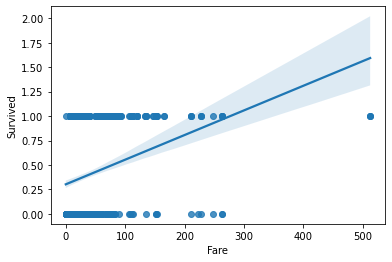

In [259]:
sns.regplot(x = 'Fare', y = 'Survived', data = df)

In [260]:
## Regresion logistica
model = sm.Logit(y, X).fit()
model.summary()
## Cond Number, Log Reg casi no sufre de multicolinealidad...

Optimization terminated successfully.
         Current function value: 0.627143
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      889
Method:                           MLE   Df Model:                            1
Date:                Tue, 19 Jul 2022   Pseudo R-squ.:                 0.05822
Time:                        21:13:53   Log-Likelihood:                -558.78
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 9.427e-17
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9413      0.095     -9.895      0.000      -1.128      -0.755
Fare           0.0152      0.002      6.809      0.000       0.011       0.020
==============================================================================
"""

In [261]:
print(model.aic)
print(model.bic)
# Menor es mejor.... y el BIC penaliza por el número de predictores.

1121.5692185134253
1131.1539073683668


# Entonces como evaluamos el modelo?


<AxesSubplot:ylabel='Frequency'>

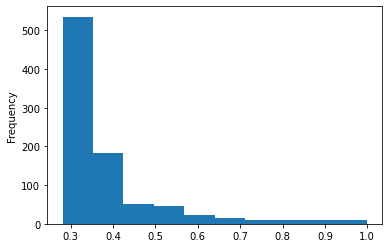

In [262]:
## Cuantas veces le achunta el modelo?
from sklearn.metrics import accuracy_score
# 0 no le achunte a nada, 1 le achunte a todo
y_pred = model.predict(X)  ## output... Probabilidad... 
y_pred.plot(kind = 'hist')

In [263]:
y_pred = y_pred > 0.5
accuracy_score(y, y_pred)
y_pred

PassengerId
1      False
2       True
3      False
4      False
5      False
       ...  
887    False
888    False
889    False
890    False
891    False
Length: 891, dtype: bool

## Modelo más potente

In [264]:
from feature_engine.encoding import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from feature_engine.wrappers import SklearnTransformerWrapper
from feature_engine.imputation import CategoricalImputer, MeanMedianImputer

X = df[['Sex', 'Age', 'Fare', 'Embarked']]
y = df.Survived
ci = CategoricalImputer(imputation_method = 'frequent') # moda
#ci = CategoricalImputer(imputation_method = 'missing')
mmi = MeanMedianImputer(imputation_method= 'median')
#mmi = MeanMedianImputer(imputation_method= 'mean')
ohe = OneHotEncoder()
sc = SklearnTransformerWrapper(StandardScaler(), variables = ['Age', 'Fare']) # Solo a numericas

# Preprocesamiento
X_ci = ci.fit_transform(X)
X_mmi = mmi.fit_transform(X_ci)
X_ohe = ohe.fit_transform(X_mmi)
X_sc = sc.fit_transform(X_ohe)
X_final = sm.add_constant(X_sc)

model = sm.Logit(y, X_final).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.490007
         Iterations 26


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Tue, 19 Jul 2022   Pseudo R-squ.:                  0.2642
Time:                        21:13:54   Log-Likelihood:                -436.60
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.275e-65
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0670        nan        nan        nan         nan         nan
Age           -0.1295      0.086     -1.508      0.132      -0.298       0.039
Fare           0.5053      0.117      4.304      0.000       0.275       0.735
Sex_male      -1.2439   6.15e+06  -2.02e-07      1.000   -1.21e+07    1.21e+07
Sex_female     1.1769   6.17e+06   1.91e-07      1.000   -1.21e+07    1.21e+07
Embarked_S    -0.2304   3.98e+06  -5.79e-08      1.000   -7.79e+06    7.79e+06
Embarked_C     0.4201   3.98e+06   1.06e-07      1.000   -7.79e+06    7.79e+06
Embarked_Q    -0.2567   3.98e+06  -6.45e-08      1.000   -7.79e+06    7.79e+06
==============================================================================
"""

In [265]:
y_pred = model.predict(X_final)
accuracy_score(y, y_pred>0.5)

0.7811447811447811

In [266]:
print(model.aic)
print(model.bic)

885.1923540327414
913.9464205975662


In [267]:
df['prob'] = y_pred
df['Odds'] = np.exp(y_pred)
df[['prob', 'Odds', 'Survived']]

,prob,Odds,Survived
PassengerId,,,
1,0.151622,1.163720,0
2,0.863133,2.370575,1
3,0.660602,1.935957,1
4,0.738074,2.091902,1
5,0.136676,1.146456,0
...,...,...,...
887,0.152749,1.165033,0
888,0.723166,2.060947,1
889,0.690832,1.995375,0


In [268]:
from sklearn.linear_model import LogisticRegression

X = df[['Fare']]
y = df.Survived

## no se añade la constante acá, scikit lo tiene por defecto...add()

lr = LogisticRegression(random_state = 42) # Equivalente a sm.Logit...
lr.fit(X, y)
y_pred = lr.predict(X)
accuracy_score(y,y_pred)

0.6655443322109988

In [269]:
lr.coef_, lr.intercept_

(array([[0.01519666]]), array([-0.94131796]))

In [270]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display = 'diagram')

X = df[['Sex','Age','Fare','Embarked']]
y = df.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = .2, random_state = 42)

In [271]:
pipe = Pipeline(steps = [
    ('ci', CategoricalImputer(imputation_method = 'frequent')),
    ('mmi', MeanMedianImputer(imputation_method = 'median')),
    ('ohe', OneHotEncoder()),
    ('sc', SklearnTransformerWrapper(StandardScaler(), variables = ['Age', 'Fare'])),
    ('lr', lr)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
y_pred_train = pipe.predict(X_train)

print(f'Accuracy calculado en Train Data: {accuracy_score(y_train, y_pred_train)}')
print(f'Accuracy calculado en Test Data: {accuracy_score(y_test, y_pred)}')
print(f'Indicador de overfitting {accuracy_score(y_train, y_pred_train) - accuracy_score(y_test, y_pred) }')

Accuracy calculado en Train Data: 0.7823033707865169
Accuracy calculado en Test Data: 0.776536312849162
Indicador de overfitting 0.00576705793735488


![msg](msg.png)

# Probar nuestro modelo

![jack](jack.png)
![rose](rose.png)
![rose](titanic.png)

In [272]:
data1 = pd.DataFrame(dict(Sex = ['male','female'], Age = [22,17], Fare = [0, 250], Embarked = ['S','S']))

pipe.predict(data1)

array([0, 1], dtype=int64)

In [273]:
from scipy.sparse import csr_matrix
matriz = csr_matrix(X_ohe)
print(matriz)

  (0, 0)	22.0
  (0, 1)	7.25
  (0, 2)	1.0
  (0, 4)	1.0
  (1, 0)	38.0
  (1, 1)	71.2833
  (1, 3)	1.0
  (1, 5)	1.0
  (2, 0)	26.0
  (2, 1)	7.925
  (2, 3)	1.0
  (2, 4)	1.0
  (3, 0)	35.0
  (3, 1)	53.1
  (3, 3)	1.0
  (3, 4)	1.0
  (4, 0)	35.0
  (4, 1)	8.05
  (4, 2)	1.0
  (4, 4)	1.0
  (5, 0)	28.0
  (5, 1)	8.4583
  (5, 2)	1.0
  (5, 6)	1.0
  (6, 0)	54.0
  :	:
  (884, 4)	1.0
  (885, 0)	39.0
  (885, 1)	29.125
  (885, 3)	1.0
  (885, 6)	1.0
  (886, 0)	27.0
  (886, 1)	13.0
  (886, 2)	1.0
  (886, 4)	1.0
  (887, 0)	19.0
  (887, 1)	30.0
  (887, 3)	1.0
  (887, 4)	1.0
  (888, 0)	28.0
  (888, 1)	23.45
  (888, 3)	1.0
  (888, 4)	1.0
  (889, 0)	26.0
  (889, 1)	30.0
  (889, 2)	1.0
  (889, 5)	1.0
  (890, 0)	32.0
  (890, 1)	7.75
  (890, 2)	1.0
  (890, 6)	1.0
